<center><b><font size = 6>Consumo de Sustancias Psicoactivas

Base 2011:
http://www.indec.gov.ar/ftp/cuadros/menusuperior/enprecosp/bases_enprecosp2011.rar

Documento:
http://www.indec.gov.ar/ftp/cuadros/menusuperior/enprecosp/enprecosp_2011_documento_baseusuario.pdf

Ejemplo cuestionario:
http://www.indec.gov.ar/ftp/cuadros/menusuperior/enprecosp/cuestionarios_enprecosp2011.pdf

### Variables ###

- Dominios de estimación geográfica: 
 - Región estadística
 - Agrupamiento de poblaciones urbanas
 - Jurisdicción del país
 - Aglomerado urbano de 500.000 y más habitantes
- Características de la vivienda donde reside la persona seleccionada
 - Tipo de vivienda
 - Cantidad de habitaciones
 - Material predominante de los pisos
 - Material predominante de la cubierta exterior del techo
 - Tenencia de cielorraso/revestimiento interior
 - Combustible usado para cocinar
 - Tenencia de agua
 - Forma de obtención del agua
 - Tenencia de baño
 - Características del baño
- Características del hogar al que pertenece la persona seleccionada
 - Tamaño del hogar
 - Tipo de hogar
 - Ingreso total mensual del hogar
 - Indicadores de necesidades básicas insatisfechas del hogar
- Características del jefe del hogar
 - Sexo
 - Edad
 - Situación conyugal
 - Nivel de instrucción
 - Cobertura de salud
 - Situación laboral
- Características de la persona seleccionada
 - Relación de parentesco del seleccionado con el jefe
 - Sexo
 - Edad
 - Situación conyugal
 - Nivel de instrucción
 - Cobertura de salud
 - Situación laboral
- Autopercepción de salud y entorno de la persona seleccionada
 - Salud general
 - Acceso y entorno
- Consumo de sustancias psicoactivas de la persona seleccionada
 - Tabaco
 - Bebidas alcohólicas
 - Tranquilizantes
 - Estimulantes
 - Marihuana
 - Cocaína
 - Pasta base
 - Éxtasis
 - Inhalables
 - Otras drogas
- Impacto del consumo en las actividades habituales de la persona seleccionada
 - Bebidas alcohólicas
 - Drogas y bebidas alcohólicas
- Demanda de tratamiento de la persona seleccionada

Estas variables nos permiten estimar distintos aspectos de la vida de la persona, como su situación económica, de hogar, hábitos, circunstancias de salud, etc, y así comprender que factores influyen en el consumo de drogas recreacionales.

### Para manejar los datos, importamos las librerias que necesitaremos:

In [1]:
%matplotlib inline
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
import numpy as np
import warnings
import scipy.stats as ss
warnings.filterwarnings('ignore')
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

### Guardamos los datos en un DataFrame de Pandas y visualizamos parte del mismo

In [2]:
path = r'D:\Matias\Python\DH\bases_enprecosp2011'
os.chdir(path)
with open('Base Usuario ENPreCoSP-2011.txt', 'rb') as data0:
    data0 = data0.read().decode()
data_spl = data0.split()
df0 = pd.DataFrame([i.split('|')[:-1] for i in data_spl[1:]], columns = [i for i in data_spl[0].split('|')])
print(df0.shape)
df0.info()
df0.head()

(34343, 291)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34343 entries, 0 to 34342
Columns: 291 entries, IDENTIFI to BIDT03
dtypes: object(291)
memory usage: 76.2+ MB


,IDENTIFI,W_PERS,REGION,POB_URB,PRVNC,AGL_URB,BHCV01,BHCV02,BHCV03,BHCV04,...,BIDT02_05,BIDT02_06,BIDT02_07,BIDT02_08,BIDT02_09,BIDT02_10,BIDT02_11,BIDT02_12,BIDT02_13,BIDT03
0,61301445099,3787,1,4,6,1,3,4,1,1,...,,,,,,,,,,
1,94924403348,5301,1,4,6,1,3,4,1,1,...,,,,,,,,,,
2,63798413037,2248,1,4,6,1,3,4,1,1,...,,,,,,,,,,
3,75477993771,6157,1,4,6,1,3,3,1,1,...,,,,,,,,,,
4,34764150916,12528,1,4,6,1,3,4,1,1,...,,,,,,,,,,


## Análisis Exploratorio de Datos ###

### Consumo de Alcohol ###

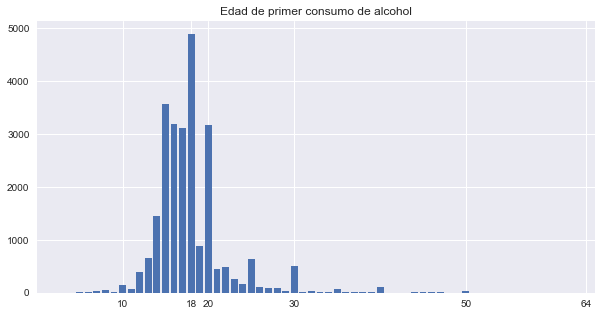

In [3]:
cantidad = [df0['BIBA03'].value_counts()[str(n)] for n in range(0, 100) if str(n) in df0['BIBA03'].value_counts().index]
edades = sorted([int(n) for n in df0['BIBA03'].value_counts().index if n.isdigit()])
plt.figure(figsize=(10,5))
plt.title('Edad de primer consumo de alcohol')
plt.bar(edades, cantidad)
plt.xlim(0, 65)
plt.xticks([10, 18, 20, 30, 50, 64])
plt.show()

Buscamos algunas correlaciones significativas, como el consumo de vino según el ingreso. 

Rho de Spearaman: 0.9133126934984519, p-value: < 0.001


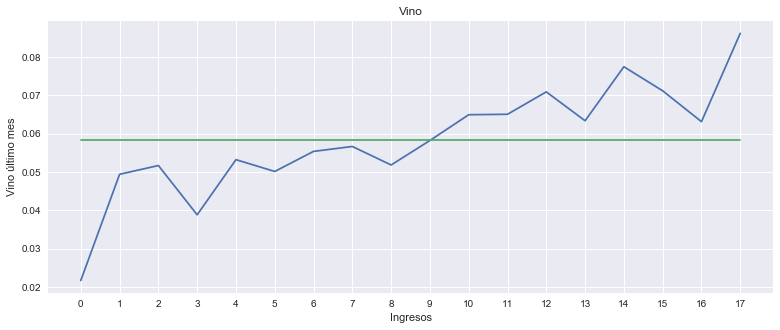

In [4]:
prevalPorRangoIngresos = [df0.groupby('RANGOING')['BIBA07_02'].value_counts()[i]['1']/df0.groupby('RANGOING')['BIBA07_02'].count()[i] for i in [str(n) for n in range(0, 18)]]
sp, p = ss.spearmanr(prevalPorRangoIngresos, [0, 300, 700, 900, 1250, 1750, 2250, 2750, 3250, 3750, 4250, 5000, 5500, 6500, 7500, 9000, 12500, 15000])
print('Rho de Spearaman: {0}, p-value: {1}'.format(sp, '< 0.001'))
plt.figure(figsize=(13,5))
plt.plot([i for i in range(0, 18)], prevalPorRangoIngresos)
plt.xlabel('Ingresos')
plt.ylabel('Vino último mes')
plt.title('Vino')
plt.xticks([i for i in range(0, 18)])
plt.plot(range(18), [np.mean(prevalPorRangoIngresos)] * 18)
plt.show()

### Consumo por Género ###

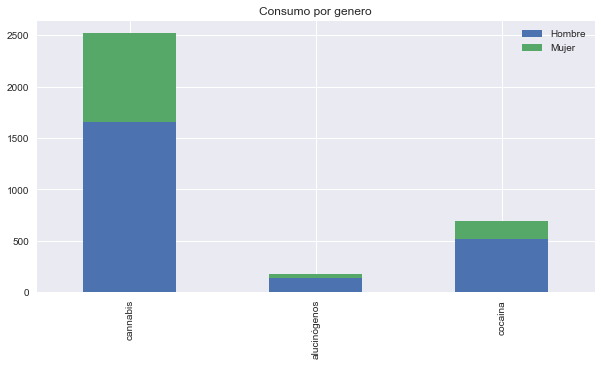

In [5]:
alcohol = df0[df0['BITA01']=='1']['BHCH04'].value_counts()
faso = df0[df0['BIMA01']=='1']['BHCH04'].value_counts()
alu = df0[df0['BIOD04_01']=='1']['BHCH04'].value_counts()
coca = df0[df0['BICO01']=='1']['BHCH04'].value_counts()
df = pd.DataFrame([faso, alu, coca])
df.index = ['cannabis', 'alucinógenos', 'cocaina']
df.plot(kind='bar',stacked=True, figsize=(10,5))
plt.legend(['Hombre', 'Mujer'])
plt.title('Consumo por genero')
plt.show()

### Distribución Geográfica de Consumo ###

In [6]:
pcias = ' 02 Ciudad Autónoma de Buenos Aires\n 06 Buenos Aires\n 10 Catamarca\n 14 Córdoba\n 18 Corrientes\n 22 Chaco\n 26 Chubut\n 30 Entre Ríos\n 34 Formosa\n 38 Jujuy\n 42 La Pampa\n 46 La Rioja\n 50 Mendoza\n 54 Misiones\n 58 Neuquén\n 62 Río Negro\n 66 Salta\n 70 San Juan\n 74 San Luis\n 78 Santa Cruz\n 82 Santa Fe\n 86 Santiago del Estero\n 94 Tierra del Fuego, Antártida Argentina e Islas del Atlántico Sur\n 90 Tucumán'
dpcias = {p[0]:' '.join(p) for p in [i.strip().split(maxsplit = 1) for i in pcias.split('\n')]}

In [7]:
#grafica por provincia la prevalencia de vida de consumo
def graph_pprev(col, droga):
    si = df0[df0[col] == '1'].groupby('PRVNC')['IDENTIFI'].count().sort_values()
    no = df0[df0[col] == '2'].groupby('PRVNC')['IDENTIFI'].count().sort_values()
    total = df0[(df0[col] == '1') | (df0[col] == '2') | (df0[col] == '9')].groupby('PRVNC')['IDENTIFI'].count()
    porcentaje = (si/total * 100).fillna(0).sort_values()
    plt.figure(figsize=(10,5))
    sns.barplot(x = porcentaje.index, y = porcentaje.values, order = porcentaje.index)
    plt.title('% de {} por provincia'.format(droga))
    plt.xlabel('Provincias')
    plt.ylabel('Porcentaje')
    plt.legend([dpcias[i] if len(i) == 2 else dpcias['0' + i] for i in porcentaje.index[::-1]], bbox_to_anchor=(1, 1.075))
    plt.show()

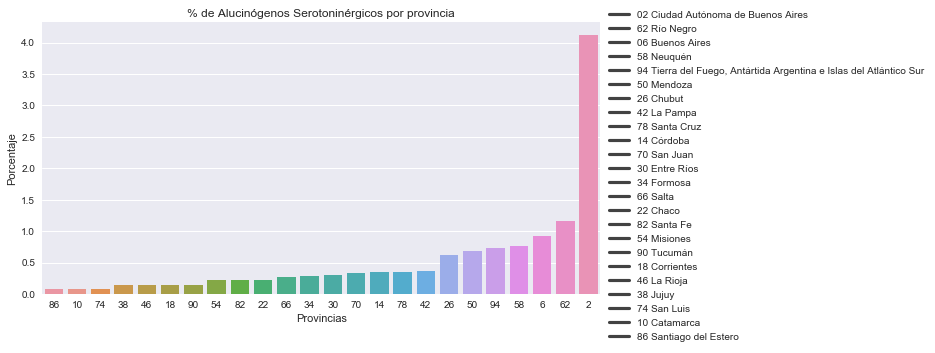

In [8]:
'''graph_pprev('BITA01', 'tabaco')
graph_pprev('BIBA01', 'alcohol')
graph_pprev('BITR01', 'tranquilizantes')
graph_pprev('BIES01', 'estimulantes')
graph_pprev('BICO01', 'cocaína')
graph_pprev('BIPB01', 'pasta base')
graph_pprev('BIEX01', 'éxtasis')
graph_pprev('BIIN01', 'inhalables')
graph_pprev('BIOD01_01', 'd para adelgazar')
graph_pprev('BIOD02_01', 'opiáceos o anestésicos')
graph_pprev('BIOD03_01', 'crack')
graph_pprev('BIOD05_01', 'otras')'''
graph_pprev('BIOD04_01', 'Alucinógenos Serotoninérgicos')

## Limpieza

In [9]:
df0 = df0.replace(['9', '99', '999', '888'], np.nan) #estos son las respuesas de "no sabe/no contesta"
df0 = df0.apply(lambda x: pd.to_numeric(x, downcast = 'float', errors = 'coerce'))
df0 = df0.fillna(0)

# Target

In [10]:
def tabaco(row):
    if (row['BITA05'] > 10 ) | (row['BITA06'] > 0 ):
        return 1
    else:
        return 0
def marihuana(row):
    if ((row['BIMA04'] == 1) | (row['BIMA06'] == 1) | (row['BIMA11'] == 1) | (row['BIMA12'] == 1) |
        (row['BIMA13'] == 1) | (row['BIMA16'] == 1)):
        return 1
    else:
        return 0
def alcohol(row):
    if ((row['AB_TC'] == 1) | (row[['BIBA07_01', 'BIBA07_02', 'BIBA07_03']].sum() > 20) |
    (row[['BIBA08_01', 'BIBA08_02', 'BIBA08_03', 'BIBA09_01', 'BIBA09_02', 'BIBA09_03']].sum() > 20) |
    (row['BIBA12'] == 1) | (row['BIBA06'] >= 3) | (row['BIBA11'] > 9)): 
        return 1
    else:
        return 0
def cocaina(row):
    if ((row['BICO04'] == 1) | (row['BICO06'] == 1) | (row['BICO11'] == 1) | 
        (row['BICO12'] == 1) | (row['BICO13'] == 1) | (row['BICO14'] == 1) | (row['BICO16'] == 1)):
        return 1
    else:
        return 0
def pastabase(row):
    if ((row['BIPB04'] == 1) | (row['BIPB06'] == 1) | (row['BIPB11'] == 1) | 
        (row['BIPB12'] == 1) | (row['BIPB13'] == 1) | (row['BIPB14'] == 1) | (row['BIPB16'] == 1)):
        return 1
    else:
        return 0
def otras(row):
    if ((row['BIEX04'] == 1) | (row['BIEX06'] == 1) | (row['BIEX11'] == 1) | 
        (row['BIEX12'] == 1) | (row['BIEX13'] == 1) | (row['BIEX15'] == 1) | 
        (row['BIEX14'] == 1) | (row['BIEX16'] == 1) | (row['BIES08'] >= 3) | 
        (row['BITR08'] >= 10) | (row['BIIN01'] == 1)):
        return 1
    else:
        return 0
def tratamientos(row):
    if ((row['BIDT01'] == 1) | (row['BIDT03'] in {1, 2})):
        return 1
    else:
        return 0

In [11]:
df0['Tabaco'] = df0.apply(tabaco, axis = 1)
df0['Marihuana'] = df0.apply(marihuana, axis = 1)
df0['Cocaina'] = df0.apply(cocaina, axis = 1)
df0['Alcohol'] = df0.apply(alcohol, axis = 1)
df0['Otras'] = df0.apply(otras, axis = 1)
df0['Tratamiento'] = df0.apply(tratamientos, axis = 1)

In [12]:
df_target = df0['Tabaco, Marihuana, Cocaina, Alcohol, Otras'.split(', ')]
#df_target['Total'] = df_target.sum(axis = 1)
#df_target['Binario'] = [1 if t > 0 else 0 for t in df_target['Total']]

In [13]:
df_target.head()

,Tabaco,Marihuana,Cocaina,Alcohol,Otras
0,0,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,1,0
4,1,0,0,1,0


In [1]:
for c in df_target.columns:
    print('Casos de consumo problemático de', df_target[c].value_counts().name, ':', df_target[c].value_counts().values)

NameError: name 'df_target' is not defined

### Prevalencia vs. Consumo Problemático

##### Consumo Problemático por Sustancia

In [15]:
pv_estimulantes = (df0['PV_ES']== 1).sum(axis=0)
pv_tranquilizantes = (df0['PV_TR'] == 1).sum(axis=0)
pv_poxi = (df0['PV_IN'] == 1).sum(axis=0)
estimulantes = (df0['BIES08']>= 3).sum(axis=0)
tranquilizantes = (df0['BITR08'] >= 10).sum(axis=0)
poxi = (df0['BIIN01'] == 1).sum(axis=0)
prevalencia = {'Sustancia': ['Tabaco', 'Alcohol', 'Marihuana', 'Cocaina', 'Extasis', 'Otras Drogas'],
        'Prevalencia de Vida': [16696, 8621, 2516, 691, 168, 1309],
        'Consumo Problematico': [9609, 4814, 377, 146, 10, 238],
        '% de Consumo Problematico': ['57,55%', '55,84%', '14,98%', '21,13%', '5,95%', '18,43%']}
df_prev = pd.DataFrame(prevalencia, columns = ['Sustancia', 'Prevalencia de Vida', 'Consumo Problematico', '% de Consumo Problematico'])
df_prev

,Sustancia,Prevalencia de Vida,Consumo Problematico,% de Consumo Problematico
0,Tabaco,16696,9609,"57,55%"
1,Alcohol,8621,4814,"55,84%"
2,Marihuana,2516,377,"14,98%"
3,Cocaina,691,146,"21,13%"
4,Extasis,168,10,"5,95%"
5,Otras Drogas,1309,238,"18,43%"


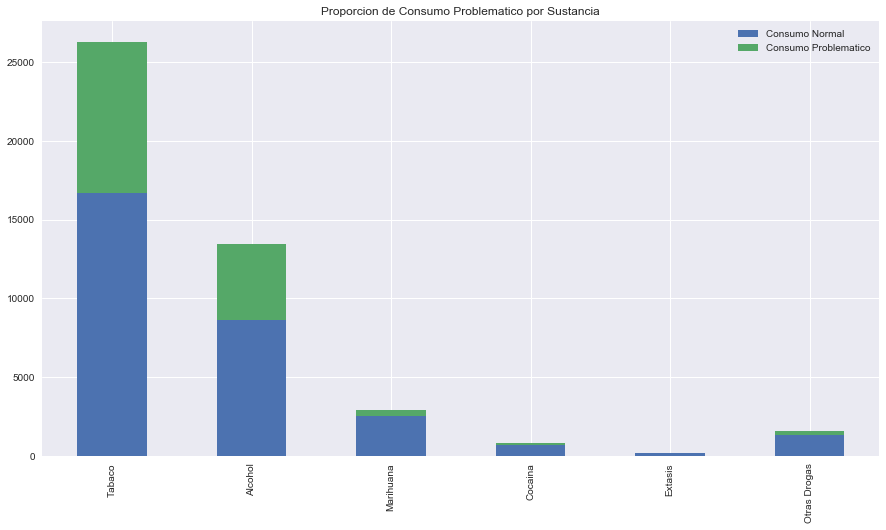

In [16]:
df_prev.index = ['Tabaco', 'Alcohol', 'Marihuana', 'Cocaina', 'Extasis', 'Otras Drogas']
df_prev.plot(kind='bar',stacked=True, figsize=(15,8))
plt.legend(['Consumo Normal', 'Consumo Problematico'])
plt.title('Proporcion de Consumo Problematico por Sustancia')
plt.show()

##### Consumo Problemático Total

In [17]:
cons_prob = {'Consumo Problematico': ['No hay Consumo Problematico', '1 droga', '2 drogas', '3 drogas o mas'], 
        '# de Consumidores': [21906, 9637, 2434, 366]}
df_cons_prob = pd.DataFrame(cons_prob, columns = ['Consumo Problematico', '# de Consumidores'])
df_cons_prob.head()

,Consumo Problematico,# de Consumidores
0,No hay Consumo Problematico,21906
1,1 droga,9637
2,2 drogas,2434
3,3 drogas o mas,366


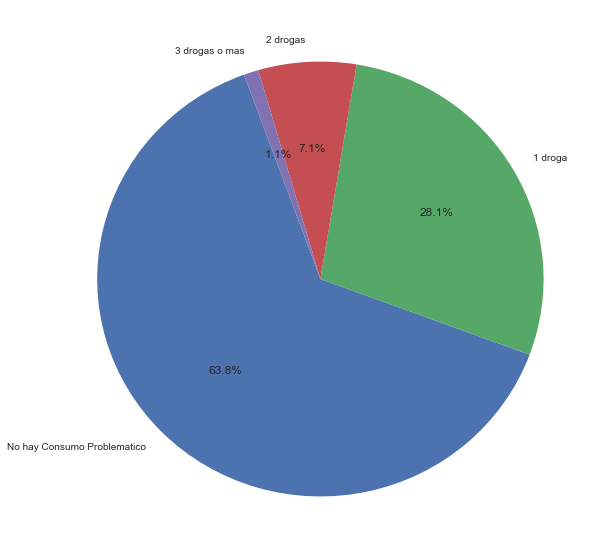

In [18]:
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.pie(df_cons_prob['# de Consumidores'],
    labels=df_cons_prob['Consumo Problematico'],
       startangle=110, autopct="%1.1f%%")

plt.show()

# Prediccion

In [19]:
#Importamos las funciones que usaremos
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
#Devuelve las n features más importantes, con nombre y ordenadas
def get_most_important(model, n):
    return sorted(zip(df_sin.columns, [str(round(i, 4)) for i in model.feature_importances_]), key = lambda x: x[1], reverse = True)[:n]

In [21]:
#hacemos un primer DataFrame con todas las columnas que no son de consumo, y algunas particulares de relevancia
df_sin = pd.get_dummies(df0[[c for c in df0.columns][2:66] + ['BITA03', 'BITA09_01', 'BITA09_02', 'BIBA03', 'BIBA14_01', 'BIBA14_02']], columns =[c for c in df0.columns][2:66] + ['BITA03', 'BITA09_01', 'BITA09_02', 'BIBA03', 'BIBA14_01', 'BIBA14_02'])
df_sin.head()

,REGION_1.0,REGION_2.0,REGION_3.0,REGION_4.0,REGION_5.0,REGION_6.0,POB_URB_1.0,POB_URB_2.0,POB_URB_3.0,POB_URB_4.0,...,BIBA03_63.0,BIBA03_64.0,BIBA14_01_0.0,BIBA14_01_1.0,BIBA14_01_2.0,BIBA14_01_3.0,BIBA14_02_0.0,BIBA14_02_1.0,BIBA14_02_2.0,BIBA14_02_3.0
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [22]:
#funcion para generar un modelo para cada droga
def make_model(drug, params, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = df_target)
    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train[drug])
    print('Cross val score: ', cross_val_score(model, X_test, y_test[drug]).mean())
    print('Roc score:', roc_auc_score(y_test[drug], model.predict_proba(X_test)[:,1]))
    print(classification_report(y_test[drug], model.predict(X_test)))
    return model

In [23]:
#Un wrapper sobre gridsearchCV. Uso recall de scoring para aumentar los positivos detectados
def get_best(model, params, drug, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = df_target)
    kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=11)
    grid_search = GridSearchCV(model, param_grid=params, 
                              cv = kf, n_jobs = 4, verbose = 1, scoring = 'recall')

    grid_search.fit(X_train, y_train[drug])
    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    print('Roc: {}'.format(roc_auc_score(y_test[drug], grid_search.predict_proba(X_test)[:,1])))

    return grid_search.best_estimator_

In [24]:
#parametros para el GridSearch de Random Forest
params_random = {'n_estimators': [2, 5, 10, 25, 50],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4, 5, 6],
                  'warm_start': [True, False]}

In [25]:
get_best(RandomForestClassifier(), params_random, 'Tabaco', df_sin, df_target)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   10.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   48.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:  2.8min finished


Best score: 0.5326037672389176
Best parameters: {'warm_start': True, 'n_estimators': 5, 'criterion': 'gini', 'max_features': 6}
Roc: 0.8515297747357244


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=True)

In [38]:
#Hacemos un primer modelo para la predicción con los mejores parámetros
best_recall_params = {'max_features': 1, 'n_estimators': 50, 'criterion': 'gini', 'warm_start': True}
cannabis_model = make_model('Marihuana', best_recall_params, df_sin, df_target)

Cross val score:  0.989420688234
Roc score: 0.970198664288
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     10187
          1       1.00      0.46      0.63       116

avg / total       0.99      0.99      0.99     10303



In [40]:
#Vuelvo a entrenar el modelo con las 30 variables que fueron más importantes
df_sinm = df_sin[[i[0] for i in get_most_important(cannabis_model, 30)]]
best_recall_params = {'max_features': 1, 'n_estimators': 50, 'criterion': 'gini', 'warm_start': True}
cannabis_model2 = make_model('Marihuana', best_recall_params, df_sinm, df_target)

Cross val score:  0.991070571224
Roc score: 0.965140044603
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     10194
          1       0.90      0.43      0.58       109

avg / total       0.99      0.99      0.99     10303



In [41]:
best_recall_params = {'max_features': 4, 'n_estimators': 25, 'criterion': 'entropy', 'warm_start': False}
alcohol_model = make_model('Alcohol', best_recall_params, df_sin, df_target)

Cross val score:  0.881199902677
Roc score: 0.890637745777
             precision    recall  f1-score   support

          0       0.92      1.00      0.96      8898
          1       0.98      0.45      0.61      1405

avg / total       0.93      0.92      0.91     10303



In [2]:
df_sina = df_sin[[i[0] for i in get_most_important(alcohol_model, 35)]]

NameError: name 'df_sin' is not defined

In [43]:
best_recall_params = {'max_features': 4, 'n_estimators': 25, 'criterion': 'entropy', 'warm_start': False}
alcohol_model2 = make_model('Alcohol', best_recall_params, df_sina, df_target)

Cross val score:  0.874696904574
Roc score: 0.904001866325
             precision    recall  f1-score   support

          0       0.92      0.99      0.95      8793
          1       0.87      0.50      0.63      1510

avg / total       0.91      0.92      0.91     10303



### Con una reducción del ~95% de las variables (de 632 a 35), mantenemos un valor predictivo muy similar, inclusive mejorando en algunos casos

In [44]:
best_params_tabaco = {'max_features': 6, 'n_estimators': 5, 'criterion': 'gini', 'warm_start': True}
tabaco_model = make_model('Tabaco', best_params_tabaco, df_sin, df_target)

Cross val score:  0.749684067912
Roc score: 0.874166528246
             precision    recall  f1-score   support

          0       0.86      0.93      0.89      7427
          1       0.76      0.60      0.67      2876

avg / total       0.83      0.84      0.83     10303



In [45]:
df_sint = df_sin[[i[0] for i in get_most_important(tabaco_model, 30)]]
best_params_tabaco = {'max_features': 6, 'n_estimators': 5, 'criterion': 'gini', 'warm_start': True}
tabaco_model2 = make_model('Tabaco', best_params_tabaco, df_sint, df_target)

Cross val score:  0.788992880793
Roc score: 0.916663714383
             precision    recall  f1-score   support

          0       0.90      0.89      0.90      7356
          1       0.74      0.75      0.74      2947

avg / total       0.85      0.85      0.85     10303



In [47]:
best_params_coc = {'max_features': 1, 'n_estimators': 50, 'criterion': 'entropy', 'warm_start': False}
otras_model = make_model('Cocaina', best_params_coc, df_sin, df_target)

Cross val score:  0.996020670454
Roc score: 0.950990929484
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     10253
          1       1.00      0.50      0.67        50

avg / total       1.00      1.00      1.00     10303



In [51]:
df_sino = df_sin[[i[0] for i in get_most_important(otras_model, 30)]]
best_params_coc = {'max_features': 1, 'n_estimators': 50, 'criterion': 'entropy', 'warm_start': False}
otras_model2 = make_model('Cocaina', best_params_coc, df_sino, df_target)

Cross val score:  0.996602968799
Roc score: 0.923205526241
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     10261
          1       0.92      0.57      0.71        42

avg / total       1.00      1.00      1.00     10303



In [59]:
best_params_otras = {'max_features': 1, 'n_estimators': 50, 'criterion': 'entropy', 'warm_start': False}
otras_model = make_model('Otras', best_params_otras, df_sin, df_target)

Cross val score:  0.993885219138
Roc score: 0.889878538231
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     10229
          1       1.00      0.55      0.71        74

avg / total       1.00      1.00      1.00     10303



In [86]:
df_sino = df_sin[[i[0] for i in get_most_important(otras_model, 30)]]
best_params_otras = {'max_features': 1, 'n_estimators': 50, 'criterion': 'entropy', 'warm_start': False}
otras_model2 = make_model('Otras', best_params_otras, df_sino, df_target)

Cross val score:  0.993108953499
Roc score: 0.885182085476
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     10232
          1       0.93      0.52      0.67        71

avg / total       1.00      1.00      1.00     10303



## Condensamos las variables seleccionadas en un nuevo DataFrame

In [80]:
all_cols = set()
for v in locals():
    if v.startswith('df_sin') and v != 'df_sin':
        for c in eval(v).columns:
            #revierto el dummie
            all_cols.add(re.match('([\w]+)_', c).group(1)) 

In [81]:
df_resultado = df0[list(all_cols)]
df_resultado.head()

,BIBA14_01,CAT_OCUP_J,BHCV02,REGION,GRUPEDAD,BHCV04,BIAC07_02,GRUPEDAD_J,BHCH04J,BHHO02,...,BHCH03,BIAC01,POB_URB,BHSL12,BISG01,BIAC07_01,BHCV06,COB_SALUD,BISG03,BHCH04
0,3.0,3.0,4.0,1.0,2.0,1.0,2.0,4.0,2.0,4.0,...,3.0,1.0,4.0,3.0,2.0,2.0,1.0,3.0,2.0,2.0
1,1.0,2.0,4.0,1.0,5.0,1.0,1.0,5.0,1.0,4.0,...,1.0,2.0,4.0,2.0,4.0,1.0,1.0,3.0,2.0,1.0
2,2.0,3.0,4.0,1.0,5.0,1.0,3.0,5.0,2.0,4.0,...,1.0,2.0,4.0,1.0,3.0,3.0,1.0,3.0,2.0,2.0
3,1.0,0.0,3.0,1.0,4.0,1.0,3.0,4.0,1.0,3.0,...,1.0,1.0,4.0,0.0,3.0,3.0,1.0,3.0,2.0,1.0
4,1.0,3.0,4.0,1.0,2.0,1.0,3.0,4.0,1.0,4.0,...,3.0,1.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,1.0


................................................................................................................................................................................................................................................................

<font size = 5><center> Con estas 38 preguntas, podemos identificar con buena precisión consumidores problemáticos de drogas, puntuando similar al cuestionario original de 291 elementos. Este cuestionario puede significar un muy buen punto de partida para una herramienta importante de screening para población en riesgo de trastornos de abuso de sustancias. 